In [120]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
import warnings

warnings.filterwarnings('ignore')


In [121]:
df = pd.read_csv('../Datasets/Travel.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [122]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [124]:
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [125]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [126]:
df['Gender'] = df['Gender'].replace('Fe Male','Female')
df['MaritalStatus'] = df['MaritalStatus'].replace('Single','Unmarried')

In [127]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [128]:
# check Missing values
# These are the features with nan value

features_with_na = [features for features in df.columns if df[features].isnull().sum() >= 1]

for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5), '% Missing values ')

Age 4.62357 % Missing values 
TypeofContact 0.51146 % Missing values 
DurationOfPitch 5.13502 % Missing values 
NumberOfFollowups 0.92062 % Missing values 
PreferredPropertyStar 0.53191 % Missing values 
NumberOfTrips 2.86416 % Missing values 
NumberOfChildrenVisiting 1.35025 % Missing values 
MonthlyIncome 4.76678 % Missing values 


In [129]:
# statistics on numerical columns(null cols)

df[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [130]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['TypeofContact'] = df['TypeofContact'].fillna(df['TypeofContact'].mode()[0])
df['DurationOfPitch'] = df['DurationOfPitch'].fillna(df['DurationOfPitch'].median())
df['NumberOfFollowups'] = df['NumberOfFollowups'].fillna(df['NumberOfFollowups'].mode()[0])
df['PreferredPropertyStar'] = df['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].mode()[0])
df['NumberOfTrips'] = df['NumberOfTrips'].fillna(df['NumberOfTrips'].median())
df['NumberOfChildrenVisiting'] = df['NumberOfChildrenVisiting'].fillna(df['NumberOfChildrenVisiting'].mode()[0])
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df['MonthlyIncome'].median())


In [131]:
df = df.drop(columns='CustomerID')

In [132]:
# create a new column for feature

df['TotalVisiting'] = df['NumberOfChildrenVisiting'] + df['NumberOfPersonVisiting']
df = df.drop(columns=['NumberOfChildrenVisiting','NumberOfPersonVisiting'])

In [133]:
# get all the numeric features

num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features: ',len(num_features))

Num of Numerical Features:  12


In [134]:
# get all the categorical features

cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of categorical Features: ',len(cat_features))

Num of categorical Features:  6


In [135]:
# get all the discrete features

discrete_features = [feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features: ',len(discrete_features))

Num of Discrete Features:  9


In [136]:
## continuous features

continuous_features = [feature for feature in num_features if len(df[feature].unique())>25]
print('No of Continuous Features: ',len(continuous_features))

No of Continuous Features:  3


# Train Test Split and Model Training

In [137]:
from sklearn.model_selection import train_test_split
y = df['ProdTaken']
x = df.drop(columns=['ProdTaken'])


In [138]:
x.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [139]:
y.shape

(4888,)

In [140]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [141]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=24)

In [142]:
# create Column Transformer with 3 types of transformers

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

cat_features = x.select_dtypes(include='object').columns
num_features = x.select_dtypes(exclude='object').columns

preprocessor = ColumnTransformer(
    transformers=[
        ('OneHotEncoder', OneHotEncoder(), cat_features),
        ('StandardScaler', StandardScaler(), num_features)
    ]
)

x_train = preprocessor.fit_transform(x_train)
x_test = preprocessor.transform(x_test)


# Random Forest Classifier Training

In [143]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score

In [144]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

for name, model in models.items():
    model.fit(x_train,y_train)
    
    # Predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Training Metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_roc_auc = roc_auc_score(y_train, y_train_pred)
    
    # Testing Metrics
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_roc_auc = roc_auc_score(y_test, y_test_pred)
    
    print(f"\n===== {name} =====")
    print("Training Set:")
    print(f"Accuracy: {train_accuracy:.4f}")
    print(f"F1 Score: {train_f1:.4f}")
    print(f"Precision: {train_precision:.4f}")
    print(f"Recall: {train_recall:.4f}")
    print(f"ROC AUC: {train_roc_auc:.4f}")
    
    print("\nTesting Set:")
    print(f"Accuracy: {test_accuracy:.4f}")
    print(f"F1 Score: {test_f1:.4f}")
    print(f"Precision: {test_precision:.4f}")
    


===== Logistic Regression =====
Training Set:
Accuracy: 0.8459
F1 Score: 0.4466
Precision: 0.7037
Recall: 0.3271
ROC AUC: 0.6474

Testing Set:
Accuracy: 0.8478
F1 Score: 0.4464
Precision: 0.6637

===== Decision Tree =====
Training Set:
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000
ROC AUC: 1.0000

Testing Set:
Accuracy: 0.8936
F1 Score: 0.7186
Precision: 0.6946

===== Random Forest =====
Training Set:
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000
ROC AUC: 1.0000

Testing Set:
Accuracy: 0.9214
F1 Score: 0.7460
Precision: 0.9097


# Hyperparameter Training

In [145]:
rf_params = {
	'max_depth' : [5,8,15,None,10],
	'max_features':[5,7,'auto',8],
	'min_samples_split' : [2,8,15,20],
	'n_estimators' : [100,200,500,1000]
}

In [146]:
rf_params

{'max_depth': [5, 8, 15, None, 10],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [147]:
# Models list for Hyperparameter tuning

randomcv_models = [
	('RF',RandomForestClassifier(),rf_params)
]

In [148]:
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]})]

In [149]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name,model,params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                param_distributions=params,
                                n_iter=100,
                                cv=3,
                                verbose=2,
                                n_jobs=-1)
    random.fit(x_train,y_train)
    model_param[name] = random.best_params_
    
for model_name in model_param:
    print(f"--------------Best Params for {model_name}----------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
--------------Best Params for RF----------------
{'n_estimators': 500, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}


In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

models = {
    'Random Forest': RandomForestClassifier(n_estimators=500,min_samples_split=2,max_features=8,max_depth=None)
}

for name, model in models.items():
    model.fit(x_train,y_train)
    
    # Predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Training Metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_roc_auc = roc_auc_score(y_train, y_train_pred)
    
    # Testing Metrics
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_roc_auc = roc_auc_score(y_test, y_test_pred)
    
    print(f"\n===== {name} =====")
    print("Training Set:")
    print(f"Accuracy: {train_accuracy:.4f}")
    print(f"F1 Score: {train_f1:.4f}")
    print(f"Precision: {train_precision:.4f}")
    print(f"Recall: {train_recall:.4f}")
    print(f"ROC AUC: {train_roc_auc:.4f}")
    
    print("\nTesting Set:")
    print(f"Accuracy: {test_accuracy:.4f}")
    print(f"F1 Score: {test_f1:.4f}")
    print(f"Precision: {test_precision:.4f}")
    print(f"Recall: {test_recall:.4f}")
    print(f"ROC AUC: {test_roc_auc:.4f}")
    


===== Random Forest =====
Training Set:
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000
ROC AUC: 1.0000

Testing Set:
Accuracy: 0.9313
F1 Score: 0.7846
Precision: 0.9162
Recall: 0.6861
ROC AUC: 0.8360


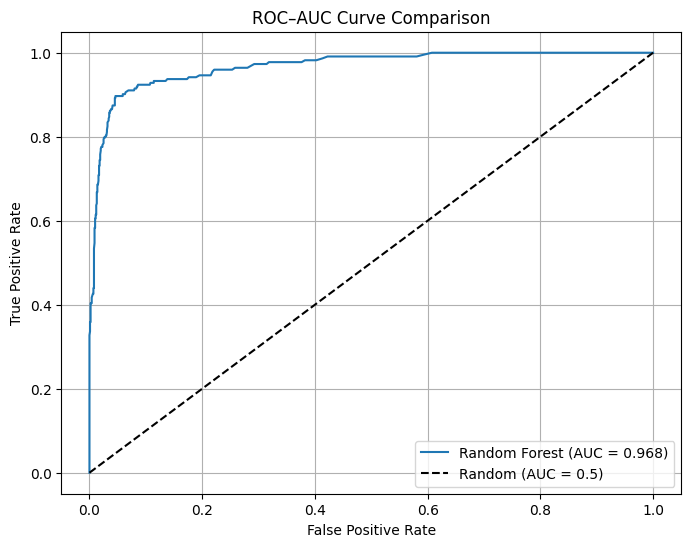

In [152]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(8, 6))

for name, model in models.items():
    # Get probability predictions (only works for classifiers with predict_proba)
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(x_test)[:, 1]
    else:
        # For models without predict_proba (like SVM), use decision_function
        y_probs = model.decision_function(x_test)
    
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    auc = roc_auc_score(y_test, y_probs)
    
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.3f})")

# Random (baseline) model line
plt.plot([0, 1], [0, 1], 'k--', label="Random (AUC = 0.5)")

plt.title("ROC–AUC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


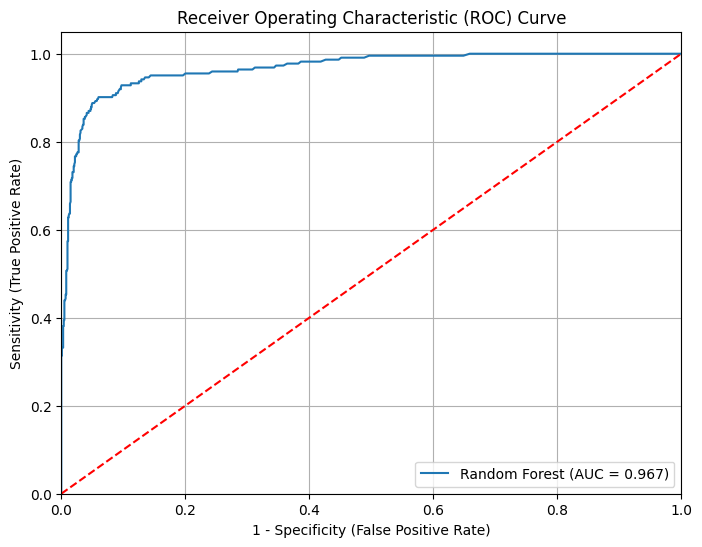

In [153]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Example models list
auc_models = [
    
    {
        'label': 'Random Forest',
        'model': RandomForestClassifier(n_estimators=1000, max_depth=None, random_state=42)
    }
]

plt.figure(figsize=(8, 6))

# Loop through models and plot ROC curves
for algo in auc_models:
    model = algo['model']
    model.fit(x_train, y_train)
    
    # Get predicted probabilities
    y_prob = model.predict_proba(x_test)[:, 1]
    
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f"{algo['label']} (AUC = {auc_score:.3f})")

# Plot diagonal line for random performance
plt.plot([0, 1], [0, 1], 'r--')

# Chart styling
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
